## A comparison of different PSF models

* Fast Gibson–Lanni scalar model<sup>1</sup>  (via [MicroscPSF-Py](https://github.com/MicroscPSF/MicroscPSF-Py))
* Gibson–Lanni scalar model<sup>2, 3</sup> (via PSFModels-Py)
* Vectorial model<sup>2, 3</sup> (via PSFModels-Py)

For more information see:

1. [Li et al. (2017) Fast and accurate three-dimensional point spread function computation for fluorescence microscopy. *J. Opt. Soc. Am. A*34, 1029-1034](https://doi.org/10.1364/JOSAA.34.001029)

2. [F. Aguet et al. (2009) Super-resolution orientation estimation and localization of fluorescent dipoles using 3-D steerable filters. *Opt. Express* 17(8), pp. 6829-6848](https://doi.org/10.1364/OE.17.006829)

a detailed explanation about the apparent differences in the scalar vs vectorial approximations, and more info on the implementation of PSFModels can be found here:<br>
3. [F. Aguet. (2009) Super-Resolution Fluorescence Microscopy Based on Physical Models. EPFL Thesis no. 4418](http://bigwww.epfl.ch/publications/aguet0903.html)


In [1]:
import psfmodels as psfm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

try:
    import microscPSF.microscPSF as msPSF
except ImportError:
    # !pip install MicroscPSF-Py
    print('Could not import MicroscPSF-Py, run or uncomment "!pip install MicroscPSF-Py" to install')
    raise


In [2]:
def compare(mp, pz):
    # calculate PSF with each of the three models
    
    ms_psf = msPSF.gLXYZFocalScan(mp, dxy, nx, zv, pz=pz)
    scal_psf = psfm.scalarXYZFocalScan(mp, dxy, nx, zv2, pz=pz)
    vec_psf = psfm.vectorialXYZFocalScan(mp, dxy, nx, zv2, pz=pz)

    #plot
    print(
        "point source %s µm above coverslip; immersion RI: %.3f; sample RI: %.3f; NA: %.2f\n"
        % (pz, mp["ni"], mp["ns"], mp["NA"])
    )
    
    fig = plt.figure(constrained_layout=True, figsize=(12,10))
    gs = fig.add_gridspec(2, 6)
    ax1 = fig.add_subplot(gs[0, :2])
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax3 = fig.add_subplot(gs[0, 4:])
    ax4 = fig.add_subplot(gs[1, :3])
    ax5 = fig.add_subplot(gs[1, 3:])

    slc = np.s_[nx//5:4*nx//5+1]
    xum = (np.linspace(-(nx-1)//2, nx//2, nx) * dxy)[slc]
    zum = (np.linspace(-(nz-1)//2, nz//2, nz) * dxy)

    ax1.imshow(ms_psf[::-1, nx//2], norm=PowerNorm(gamma=0.4))
    ax2.imshow(scal_psf[:, nx//2], norm=PowerNorm(gamma=0.4))
    ax3.imshow(vec_psf[:, nx//2], norm=PowerNorm(gamma=0.4))
    ax4.plot(xum, ms_psf[nz//2, nx//2, :][slc], 'r')
    ax4.plot(xum, scal_psf[nz//2, nx//2, :][slc], 'b:', alpha=0.7)
    ax4.plot(xum, vec_psf[nz//2, nx//2, :][slc], 'm', alpha=0.7)
    ax5.plot(zum, ms_psf[::-1, nx//2, nx//2], 'r')
    ax5.plot(zum, scal_psf[:, nx//2, nx//2], 'b:', alpha=0.7)
    ax5.plot(zum, vec_psf[:, nx//2, nx//2], 'm', alpha=0.7)
    ax1.set_title('MicroscPSF-Py (Scalar)')
    ax2.set_title('PSFModels-Scalar')
    ax3.set_title('PSFModels-Vectorial')
    ax4.set_title('Lateral Profile')
    ax4.legend(['MicroscPSF-Py (Scalar)', 'PSFModels-Scalar', 'PSFModels-Vectorial'])
    ax5.set_title('Axial Profile')
    ax5.legend(['MicroscPSF-Py (Scalar)', 'PSFModels-Scalar', 'PSFModels-Vectorial'])
    plt.show()

point source 0 µm above coverslip; immersion RI: 1.515; sample RI: 1.470; NA: 1.42



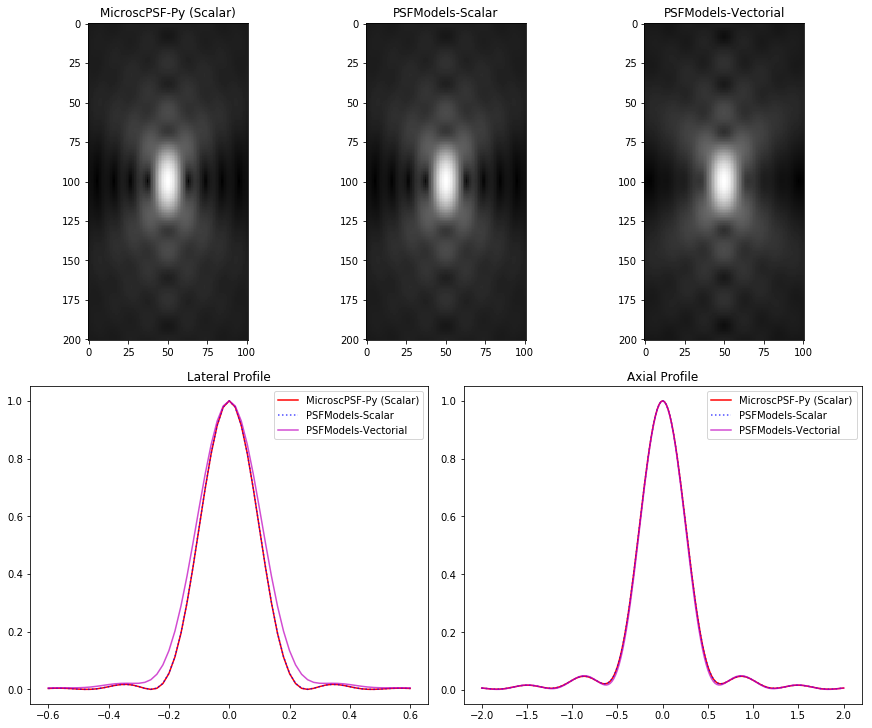

In [3]:
mp = msPSF.m_params.copy()
mp.update({
    'NA': 1.42,  # Numerical Aperture
    'ns': 1.47   # refractive index of specimen
})
dxy = 0.02  # voxel size
pz = 0  # particle position relative to coverslip
zv = np.arange(-2 - pz, 2 + dxy - pz, dxy)  # create vector of Z positions (point source will always be at center)
zv2 = np.arange(-2 + pz, 2 + dxy + pz, dxy) # (PSFmodels and MicroscPSF currently have inverted coords for pz)
nx = 101  # number of xy pixels
nz = len(zv)  # numbert of Z pixels
compare(mp, pz)

point source 2 µm above coverslip; immersion RI: 1.515; sample RI: 1.380; NA: 1.42



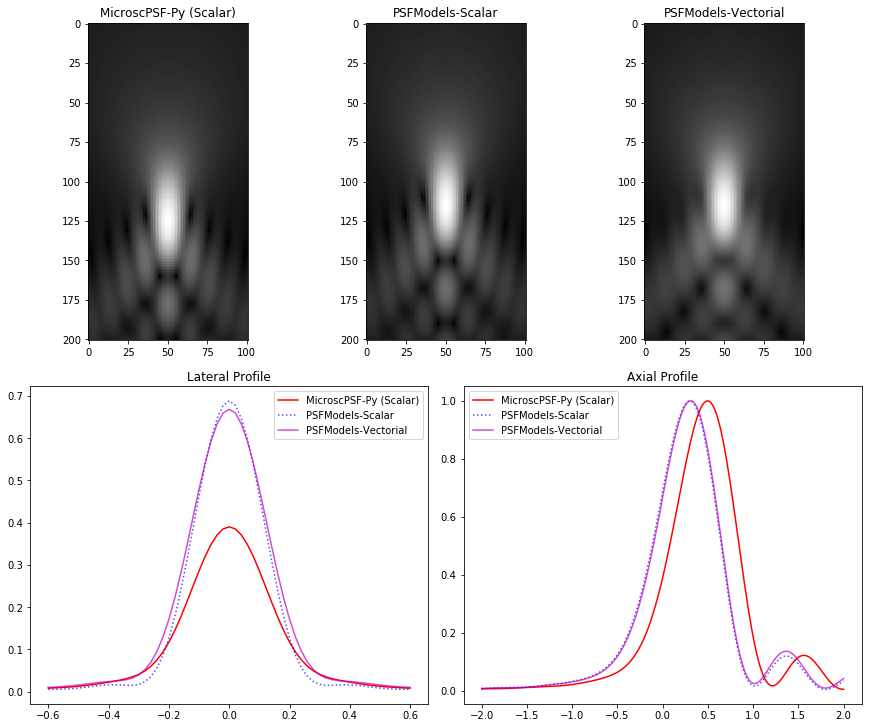

In [4]:
pz = 2  # particle position relative to coverslip
mp['ns'] = 1.38
zv = np.arange(-2 - pz, 2 + dxy - pz, dxy)  # create vector of Z positions (point source will always be at center)
zv2 = np.arange(-2 + pz, 2 + dxy + pz, dxy) # (PSFmodels and MicroscPSF currently have inverted coords for pz)
compare(mp, pz)

In [5]:
# speed comparison
%time _ = msPSF.gLXYZFocalScan(mp, dxy, nx, zv, pz=pz)
%time _ = psfm.scalarXYZFocalScan(mp, dxy, nx, zv2, pz=pz)
%time _ = psfm.vectorialXYZFocalScan(mp, dxy, nx, zv2, pz=pz)
    

CPU times: user 217 ms, sys: 32.1 ms, total: 249 ms
Wall time: 102 ms
CPU times: user 1.69 s, sys: 39 ms, total: 1.73 s
Wall time: 1.62 s
CPU times: user 2.53 s, sys: 8.65 ms, total: 2.54 s
Wall time: 2.53 s
